In [ ]:
Business problem:Credit card fraud is a significant issue that can lead to substantial financial losses for banks, merchants, and customers. The challenge is to develop a robust system that can accurately identify fraudulent transactions in real-time, minimizing false positives and negatives, and thereby protecting all stakeholders involved.


In [ ]:
Objectives:
Detect Fraudulent Transactions
Constraints:
Minimize imbalanced classes

In [11]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, recall_score,classification_report,confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [36]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [4]:
df.isna().sum().sum()



2

In [5]:
df.duplicated().sum()

53

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,...,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,10121.161817,-0.235676,0.284287,0.846047,0.302775,-0.118730,0.128013,-0.157297,-0.016148,0.989827,...,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,7739.625811,1.720315,1.394804,1.561376,1.500595,1.289494,1.320395,1.238583,1.262024,1.214044,...,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.250000,-0.969786,-0.282728,0.407297,-0.623141,-0.717155,-0.624025,-0.616307,-0.182270,0.288101,...,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,9086.500000,-0.319439,0.252904,0.960978,0.220104,-0.191627,-0.144198,-0.111960,0.016945,0.971414,...,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,17103.500000,1.162662,0.884741,1.607031,1.198942,0.351255,0.508494,0.421830,0.265736,1.654184,...,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [7]:
df['Class'].value_counts()

,count
Class,
0.0,13897
1.0,56


<Axes: xlabel='Class', ylabel='count'>

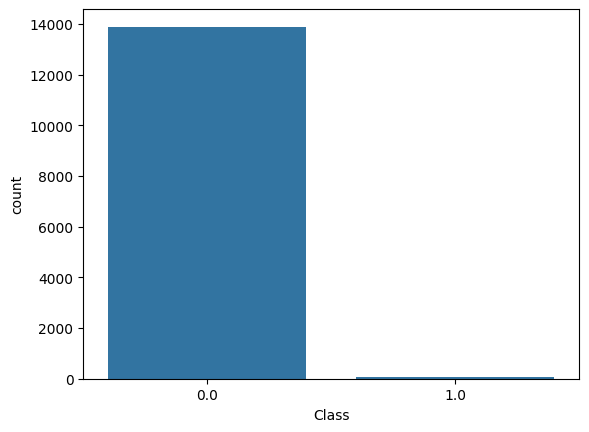

In [8]:
sns.countplot(data =df, x = 'Class')

In [9]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming 'df' is your dataframe with numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    print(f"Column: {col}")
    print(f"1st Moment (Mean): {np.mean(df[col]):.2f}")
    print(f"1st Moment (Median): {np.median(df[col]):.2f}")

    # Using try-except to handle cases where no mode is found
    try:
        print(f"1st Moment (Mode): {stats.mode(df[col]).mode[0]:.2f}")
    except:
        print("1st Moment (Mode): No unique mode found")

    print(f"2nd Moment (Variance): {np.var(df[col]):.2f}")
    print(f"2nd Moment (Standard deviation): {np.std(df[col]):.2f}")
    print(f"3rd Moment (Skewness): {stats.skew(df[col]):.2f}")
    print(f"4th Moment (Kurtosis): {stats.kurtosis(df[col]):.2f}")

Column: Time
1st Moment (Mean): 10121.16
1st Moment (Median): 9086.50
1st Moment (Mode): No unique mode found
2nd Moment (Variance): 59897514.89
2nd Moment (Standard deviation): 7739.35
3rd Moment (Skewness): 0.40
4th Moment (Kurtosis): -1.21
Column: V1
1st Moment (Mean): -0.24
1st Moment (Median): -0.32
1st Moment (Mode): No unique mode found
2nd Moment (Variance): 2.96
2nd Moment (Standard deviation): 1.72
3rd Moment (Skewness): -2.96
4th Moment (Kurtosis): 20.67
Column: V2
1st Moment (Mean): 0.28
1st Moment (Median): 0.25
1st Moment (Mode): No unique mode found
2nd Moment (Variance): 1.95
2nd Moment (Standard deviation): 1.39
3rd Moment (Skewness): -2.36
4th Moment (Kurtosis): 58.29
Column: V3
1st Moment (Mean): 0.85
1st Moment (Median): 0.96
1st Moment (Mode): No unique mode found
2nd Moment (Variance): 2.44
2nd Moment (Standard deviation): 1.56
3rd Moment (Skewness): -5.69
4th Moment (Kurtosis): 61.35
Column: V4
1st Moment (Mean): 0.30
1st Moment (Median): 0.22
1st Moment (Mode): 

In [16]:
!pip install ydata-profiling




In [17]:
from ydata_profiling import ProfileReport

In [18]:
# Load your dataset
data = pd.read_csv('/content/creditcard.csv')

# Generate the report
profile = ProfileReport(data)
profile.to_file("eda_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7930f8c6bcb0, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 81.0 MB/s eta 0:00:00


In [20]:
import sweetviz as sv

In [21]:
data = pd.read_csv(r"/content/creditcard.csv")

# Generate the EDA report
report = sv.analyze(data)

# Show the report in an HTML format (opens in a new tab)
report.show_html('eda_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [37]:
# Remove missing values (if any)
df = df.dropna()

In [38]:
# Remove duplicate rows
df = df.drop_duplicates()

In [39]:
# Remove outliers using Z-Score method
# Calculate Z-scores for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df_cleaned = df[(z_scores < 3).all(axis=1)]

In [40]:
# Separate features and target
X = df_cleaned.drop('Class', axis=1)  # 'Class' is the target column
y = df_cleaned['Class']

In [41]:
# Define preprocessing for numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()


In [43]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('encoder', OneHotEncoder(drop='first'))
])

In [44]:
# Combine both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [45]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a full pipeline with preprocessing and model
pipeline_with_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [46]:
# Fit the model
pipeline_with_model.fit(X_train, y_train)

# Make predictions
y_pred = pipeline_with_model.predict(X_test)

print("Model training complete. Predictions:", y_pred)

Model training complete. Predictions: [0 0 0 ... 0 0 0]
